In [25]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Leer el archivo de datos
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [27]:
# Mostrar las primeras filas del dataframe
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [28]:
# Mostrar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [29]:
# Mostrar la descripción del dataframe
df.describe().round(2)

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.00,2443651.00,2443651.00,2443651.00,2443651.00
mean,1370545.35,2.15,480.63,89.24,25.90
std,816056.17,2.19,5944.12,345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,658921.50,0.00,0.00,9.99,0.00
50%,1349029.00,0.00,0.00,19.09,0.00
75%,2060685.50,4.40,59.00,45.99,0.00
max,2828593.00,5.00,1356658.00,100000.00,50000.00


In [30]:
# Parte 1: Entendiendo las Categorías de Productos

In [31]:
# 1.1. Tablas de Frecuencia
category_freq = df['category'].value_counts()
top_5_categories = category_freq.head(5)
print("Top 5 categorías más listadas:")
print(top_5_categories)

Top 5 categorías más listadas:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


         uid        asin                                              title  \
82163  89483  B07DLGZ828  Neutrade GoPro 3M Sticky Pads Double Sided Adh...   
82164  89484  B09HGZHXJT  WOLFANG Action Camera 4K 20MP GA100, Waterproo...   
82165  89485  B08G2HBBB6  GoPro HERO9 - Waterproof Sports Camera with Fr...   
82166  89486  B09D15SFMQ  GoPro HERO10 Black - Waterproof Action Camera ...   
82167  89487  B08LD4VXGL  FitStill 60M/196FT Waterproof Case for Go Pro ...   

       stars  reviews   price  isBestSeller  boughtInLastMonth  \
82163    4.2     3116    6.49         False                  0   
82164    4.2     2594   49.99         False                  0   
82165    4.5     5161  199.00          True                  0   
82166    4.4     2467  249.99         False                  0   
82167    4.5     9879   16.98          True                  0   

                category  
82163  Sports & Outdoors  
82164  Sports & Outdoors  
82165  Sports & Outdoors  
82166  Sports & Outd

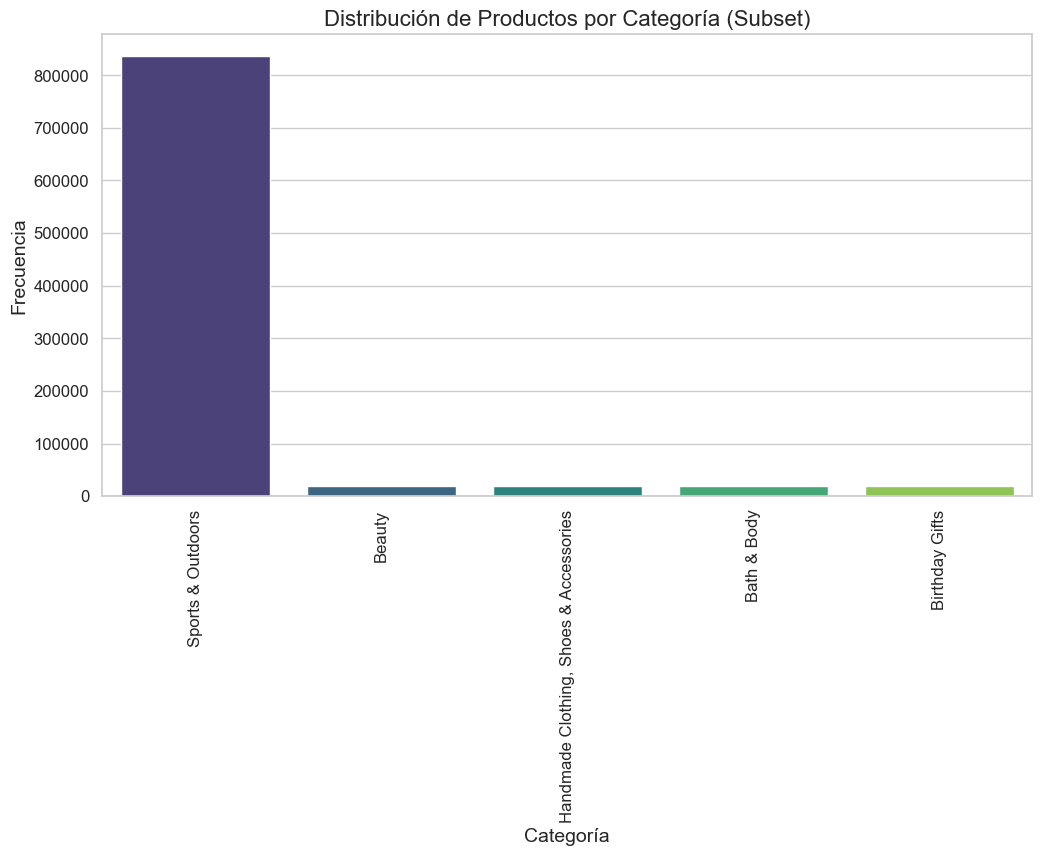

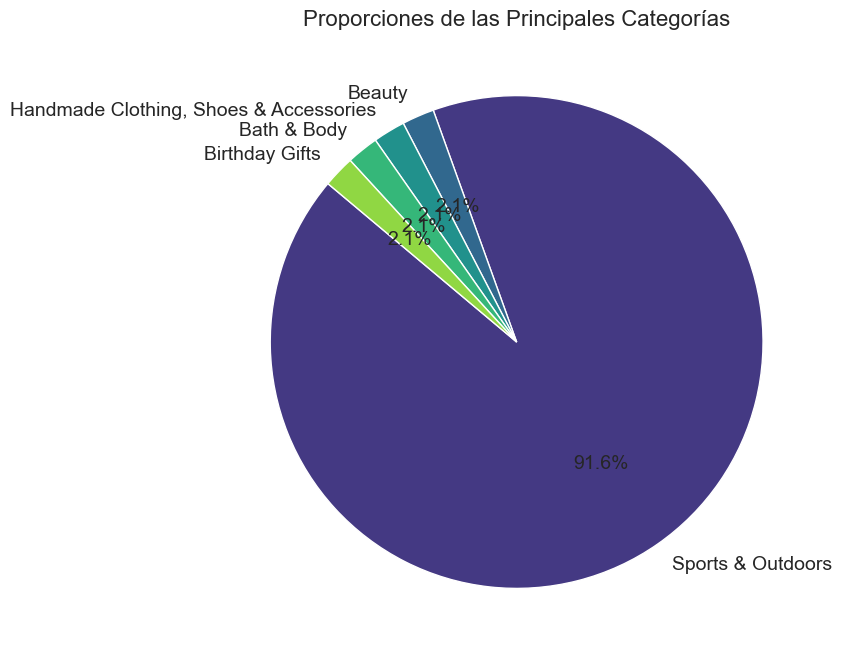

In [32]:
# 1.2. Visualizaciones

# Crear un subset del dataframe con las categorías principales
subset_df = df[df['category'].isin(top_5_categories.index)]
print(subset_df.head())

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para la distribución de productos en las principales categorías
plt.figure(figsize=(12, 6))
sns.barplot(x=subset_df['category'].value_counts().index, y=subset_df['category'].value_counts().values, palette="viridis")
plt.title('Distribución de Productos por Categoría (Subset)', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Gráfico de pastel para las proporciones de las principales categorías
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", len(top_5_categories))
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('Proporciones de las Principales Categorías', fontsize=16)
plt.ylabel('')
plt.show()

In [33]:
# Parte 2: Explorando los Precios de los Productos

# 2.1. Medidas de Centralidad
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
print(f"Precio promedio: {mean_price}")
print(f"Precio mediano: {median_price}")
print(f"Precio más común (moda): {mode_price}")

# 2.2. Medidas de Dispersión
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print(f"Varianza del precio: {variance_price}")
print(f"Desviación estándar del precio: {std_dev_price}")
print(f"Rango del precio: {range_price}")
print(f"Rango intercuartílico del precio: {iqr_price}")


Precio promedio: 89.24380943923663
Precio mediano: 19.09
Precio más común (moda): 9.99
Varianza del precio: 119445.48532256528
Desviación estándar del precio: 345.60886175352226
Rango del precio: 100000.0
Rango intercuartílico del precio: 36.0


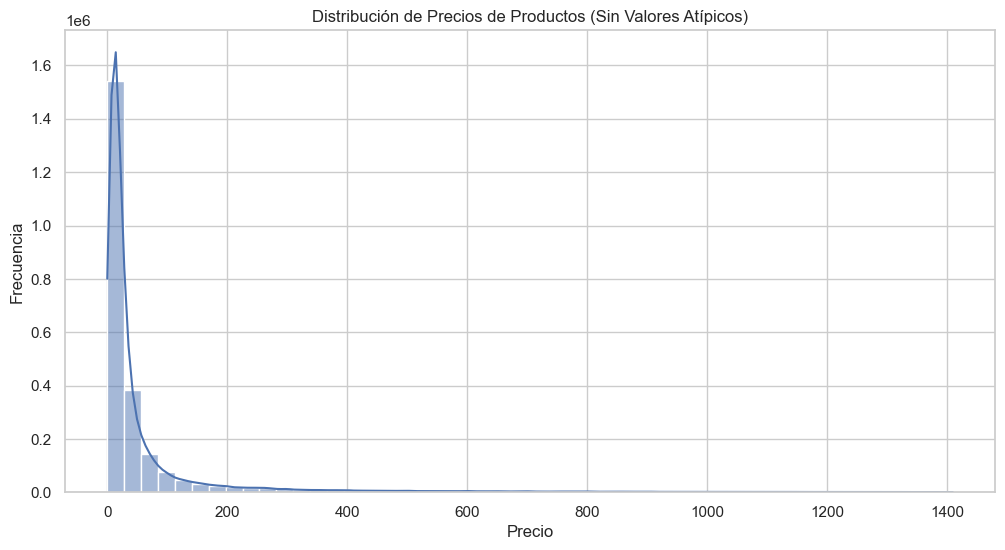

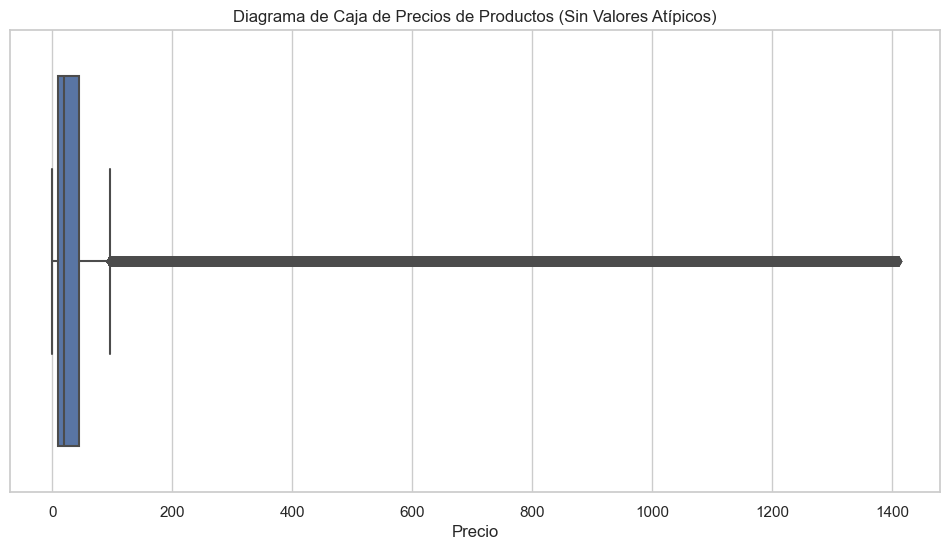

In [34]:
# 2.3. Visualizaciones

# Filtrar los precios para eliminar valores atípicos
filtered_df = df[df['price'] < df['price'].quantile(0.99)]

# Histograma de la distribución de precios
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['price'], bins=50, kde=True)
plt.title('Distribución de Precios de Productos (Sin Valores Atípicos)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para mostrar la dispersión y los valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df['price'])
plt.title('Diagrama de Caja de Precios de Productos (Sin Valores Atípicos)')
plt.xlabel('Precio')
plt.show()

In [37]:
# Parte 3: Desempaquetando las Calificaciones de los Productos

if 'stars' in df.columns:
	# 3.1. Medidas de Centralidad
	mean_rating = df['stars'].mean()
	median_rating = df['stars'].median()
	mode_rating = df['stars'].mode()[0]
	print(f"Calificación promedio: {mean_rating}")
	print(f"Calificación mediana: {median_rating}")
	print(f"Calificación más común (moda): {mode_rating}")

	# 3.2. Medidas de Dispersión
	variance_rating = df['stars'].var()
	std_dev_rating = df['stars'].std()
	iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
	print(f"Varianza de la calificación: {variance_rating}")
	print(f"Desviación estándar de la calificación: {std_dev_rating}")
	print(f"Rango intercuartílico de la calificación: {iqr_rating}")

	# 3.3. Forma de la Distribución
	skewness_rating = df['stars'].skew()
	kurtosis_rating = df['stars'].kurtosis()
	print(f"Asimetría de la calificación: {skewness_rating}")
	print(f"Curtosis de la calificación: {kurtosis_rating}")
else:
	print("La columna 'stars' no está presente en el dataframe.")

Calificación promedio: 2.152836472966065
Calificación mediana: 0.0
Calificación más común (moda): 0.0
Varianza de la calificación: 4.81743402976196
Desviación estándar de la calificación: 2.1948653785054697
Rango intercuartílico de la calificación: 4.4
Asimetría de la calificación: 0.08120735761080985
Curtosis de la calificación: -1.9260061280432985


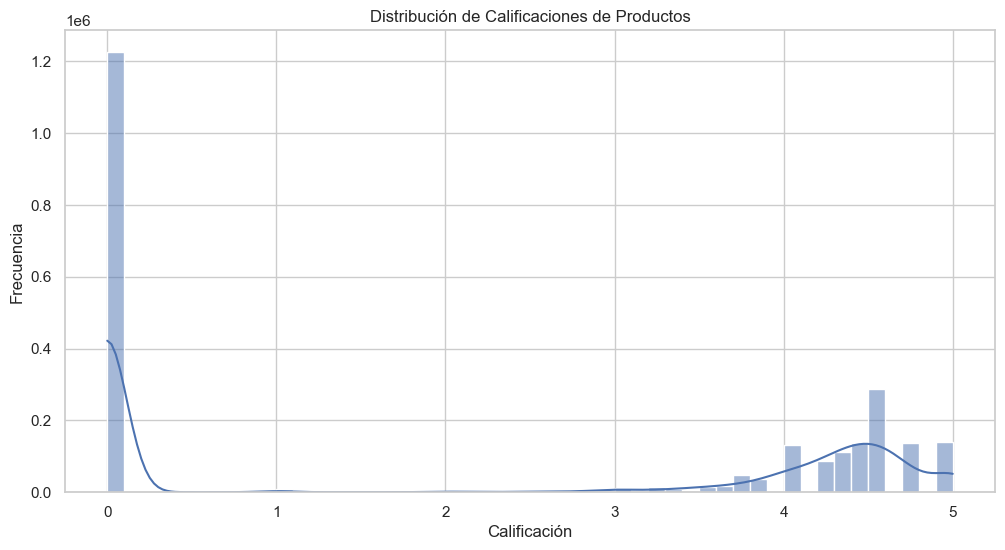

In [39]:
# 3.4. Visualizaciones
# Histograma de la distribución de calificaciones
plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], bins=50, kde=True)
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()